In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

# Risco crédito

In [2]:
with open('risco_credito.pkl', 'rb') as file:
    x_risco, y_risco = pickle.load(file)

In [3]:
x_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [4]:
y_risco

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
# Apagar os registros dos índices 2, 7 e 11
x_risco = np.delete(x_risco, [2,7,11], axis=0)
y_risco = np.delete(y_risco, [2,7,11], axis=0)

y_risco

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [7]:
log_risco = LogisticRegression(random_state=1)
log_risco.fit(x_risco, y_risco)

LogisticRegression(random_state=1)

In [8]:
log_risco.intercept_ #Equivale ao parâmetro B0 (ver aulas teóricas)

array([-0.80828993])

In [9]:
log_risco.coef_ #Equivalem aos parâmetros B1, B2, B3 e B4 (ver aulas teóricas)

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [10]:
# historia boa (0), divida alta (0), gatantia nenhuma (1), renda > 35 (2)
# historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)

previsoes1 = log_risco.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

# Base crédito

In [11]:
with open('credit.pkl', 'rb') as file:
    x_credit_trein, y_credit_trein, x_credit_test, y_credit_test = pickle.load(file)

In [12]:
log_credit = LogisticRegression(random_state=1)
log_credit.fit(x_credit_trein, y_credit_trein)

LogisticRegression(random_state=1)

In [13]:
print(log_credit.intercept_)
print(log_credit.coef_)

[-6.02975455]
[[-2.5492665  -3.72279323  3.93940035]]


In [14]:
previsoes2 = log_credit.predict(x_credit_test)
previsoes2

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [15]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
accuracy_score(y_credit_test, previsoes2)

0.946

0.946

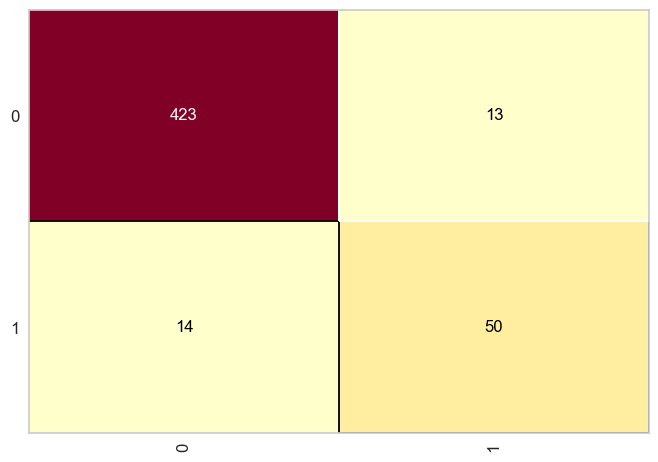

In [17]:
cm = ConfusionMatrix(log_credit)
cm.fit(x_credit_trein, y_credit_trein)
cm.score(x_credit_test, y_credit_test)

In [18]:
print(classification_report(y_credit_test, previsoes2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



# Base Census

In [19]:
with open('census.pkl', 'rb') as file:
    x_census_trein, y_census_trein, x_census_test, y_census_test = pickle.load(file)

In [20]:
log_census = LogisticRegression(random_state=1)
log_census.fit(x_census_trein, y_census_trein)

LogisticRegression(random_state=1)

In [21]:
previsoes3 = log_census.predict(x_census_test)
previsoes3

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [22]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [23]:
accuracy_score(y_census_test, previsoes3)

0.849539406345957

0.849539406345957

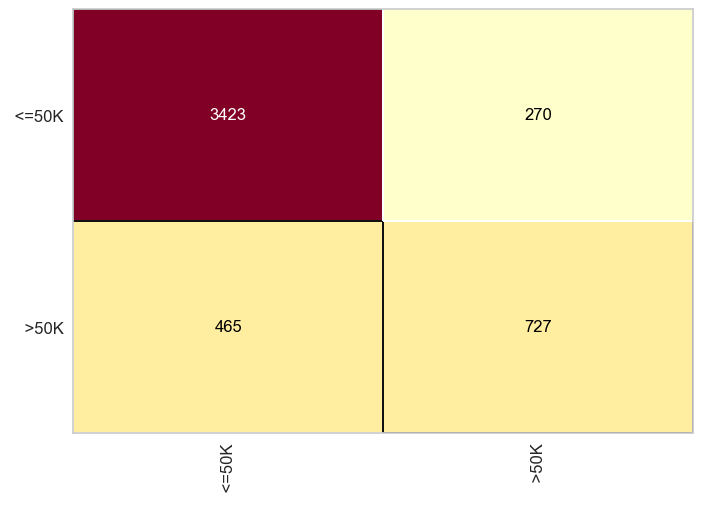

In [24]:
cm = ConfusionMatrix(log_census)
cm.fit(x_census_trein, y_census_trein)
cm.score(x_census_test, y_census_test)

In [25]:
print(classification_report(y_census_test, previsoes3))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

